In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
X = np.empty((100, 2))
X[:,0] = np.random.uniform(0.0, 100.0, size=100)
X[:,1] = 0.75 * X[:,0] + 3.0 + np.random.normal(0, 10.0, size=100)

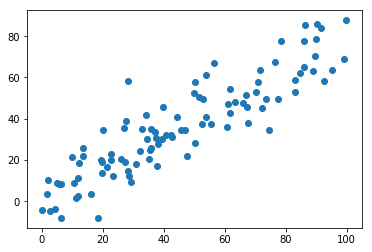

In [17]:
plt.scatter(X[:,0], X[:,1])

### demean

In [18]:
def demean(X):
    return X - np.mean(X, axis=0)

In [22]:
X_demean = demean(X)

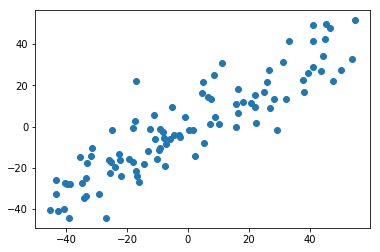

In [23]:
plt.scatter(X_demean[:,0], X_demean[:,1])

In [24]:
 np.mean(X_demean[:,0])

9.947598300641402e-15

In [25]:
 np.mean(X_demean[:,1])

-1.8474111129762605e-15

### 梯度上升法

In [26]:
def f(w, X):
    return np.sum(X.dot(w)**2)  / len(X)

In [27]:
def df_math(w, X):
    return X.T.dot(X.dot(w)) * 2.0 / len(X)

In [29]:
def df_debug(w, X, epsilon=0.0001):
    res = np.empty(len(w))
    for i in range(len(w)):
        w_1 = w.copy()
        w_1[i] += epsilon
        w_2 = w.copy()
        w_2[i] -= epsilon
        res[i] = ((f(w_1, X)) - f(w_2, X)) / (2 * epsilon)
    return res

In [35]:
### 把w向量编程单位向量，np.linalg.norm(w)表示取向量w的摸
def direction(w):
    return w / np.linalg.norm(w)

def gradient_aescent(df, X, initial_w, eta, n_iters=1e4, epsilon=1e-8):
    w = direction(initial_w)
    cur_iter = 0

    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = w + eta * gradient
        w = direction(w)    ## 注意1:每次求一个单位方向向量
        if (abs(f(w, X) - f(last_w, X)) < epsilon):
            break

        cur_iter += 1

    return w

In [37]:
initial_w = np.random.random(X.shape[1])  ## 注意2：不能用0向量开始
initial_w

array([0.4055269 , 0.95965234])

In [38]:
eta = 0.01

In [41]:
'''
注意3：不能使用StandardScaler标准化数据
因为标准化的过程就是把样本你方差变为0的过程，而PCA就是求方差最大的过程
'''
gradient_aescent(df_debug, X_demean, initial_w, eta)

array([0.7712314 , 0.63655489])

In [47]:
gradient_aescent(df_math, X_demean, initial_w, eta)

array([0.7712314 , 0.63655489])

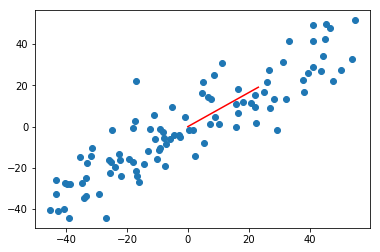

In [53]:
w = gradient_aescent(df_math, X_demean, initial_w, eta)
plt.scatter(X_demean[:,0], X_demean[:,1])
plt.plot([0, w[0]*30], [0,w[1]*30], color='r')

In [55]:
X2 = np.empty((100, 2))
X2[:,0] = np.random.uniform(0.0, 100.0, size=100)
### 0.75为直线与x轴的夹角的tan值   0.75=3/4，标准归一化后为0.6/0.8
X2[:,1] = 0.75 * X2[:,0] + 3.0

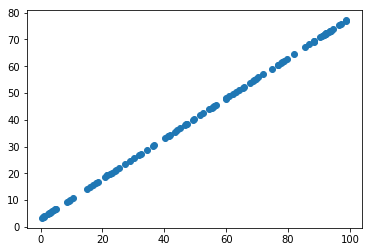

In [56]:
plt.scatter(X2[:,0], X2[:,1])

In [57]:
X2_demean = demean(X2)

In [60]:
## 0.8/0.6
gradient_aescent(df_math, X2_demean, initial_w, eta)

array([0.79999999, 0.60000002])

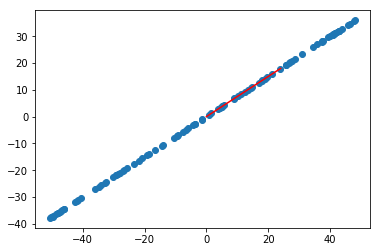

In [62]:
w2 = gradient_aescent(df_math, X2_demean, initial_w, eta)
plt.scatter(X2_demean[:,0], X2_demean[:,1])
plt.plot([0, w2[0]*30], [0,w2[1]*30], color='r')